# Задание 1

### Импорт необходимых библиотек

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Метрика для оценки модели

In [2]:
def metric(y_true, y_pred):
    
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_pred) * 100

### Импорт данных и предпросмотр

In [3]:
df_sales = pd.read_csv(r'data_regression_for_task.csv')

In [4]:
df_sales.head(10)

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0
5,2017,4,REPUBLIC NATIONAL DISTRIBUTING CO,101680,MANISCHEWITZ CREAM WH CONCORD - 1.5L,WINE,0.0,0.0
6,2017,4,ROYAL WINE CORP,101753,BARKAN CLASSIC PET SYR - 750ML,WINE,0.0,0.0
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,0.0
8,2017,4,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,0.0,0.0
9,2017,4,MONSIEUR TOUTON SELECTION,102083,CH DE LA CHESNAIE MUSCADET - 750ML,WINE,0.0,0.0


### Узнаем длину набора данных

In [5]:
len(df_sales.index)

128355

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YEAR           128355 non-null  int64  
 1   MONTH          128355 non-null  int64  
 2   CONTRAGENT     128331 non-null  object 
 3   ARTICLE_CODE   128355 non-null  object 
 4   ARTICLE_NAME   128355 non-null  object 
 5   ARTICLE_GROUP  128354 non-null  object 
 6   SALES          128355 non-null  float64
 7   STORE_SALES    128355 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.8+ MB


### Как видно по типу данных - в столбце "CONTRAGENT" содержится 24 значения NULL,  а в столбце "ARTICLE_GROUP" - 1 значение NULL. В остальных столбцах не присутствуют значения NULL.

In [7]:
df_sales[['SALES','STORE_SALES']].describe()

,SALES,STORE_SALES
count,1.283550e+05,128355.000000
mean,6.563037e+03,22.624213
std,2.892494e+04,239.693277
min,-6.490000e+03,-4996.000000
25%,0.000000e+00,0.000000
50%,3.300000e+02,1.000000
75%,3.250000e+03,4.000000
max,1.616600e+06,16271.750000


### Как видно из описательной статистики - в обоих столбцах встречаются отрицательные значения. Необходимо узнать природу этих данных

In [8]:
df_sales[df_sales['CONTRAGENT'].isna() | df_sales['ARTICLE_GROUP'].isna()]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
19483,2017,6,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-9.0
20056,2017,8,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-5.0
32282,2017,6,NaN,BC,BEER CREDIT,REF,0.0,-58.0
32283,2017,6,NaN,WC,WINE CREDIT,REF,0.0,-8.0
45871,2017,8,NaN,BC,BEER CREDIT,REF,0.0,-699.0
45872,2017,8,NaN,WC,WINE CREDIT,REF,0.0,-5.0
46518,2017,9,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-9.0
59259,2017,9,NaN,BC,BEER CREDIT,REF,0.0,-502.0
59260,2017,9,NaN,WC,WINE CREDIT,REF,0.0,-15.0
59920,2017,10,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-6.0


### Как видно по пропущенным значениям - пропущенные значения у поставщиков не относятся к продажам. Скорее всего это данные по закупкам пустых кег, ящиков пива и ящиков вина.
### Строчка, в которой пропущен акрикль группы можно восстановить - товар относится к группе вин.

In [9]:
df_sales_copy = df_sales.copy()
df_sales_copy['ARTICLE_GROUP'] = df_sales_copy['ARTICLE_GROUP'].replace(np.nan, 'WINE')
df_sales_copy[df_sales_copy['ARTICLE_GROUP'].isna()]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES


In [10]:
df_sales_copy.loc[(df_sales_copy['ARTICLE_NAME'] == 'WINE CREDIT')
             | (df_sales_copy['ARTICLE_NAME'] == 'BEER CREDIT')
             | (df_sales_copy['ARTICLE_NAME'] == 'EMPTY WINE KEG - KEGS')]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
19483,2017,6,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-9.0
20056,2017,8,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-5.0
32282,2017,6,NaN,BC,BEER CREDIT,REF,0.0,-58.0
32283,2017,6,NaN,WC,WINE CREDIT,REF,0.0,-8.0
45871,2017,8,NaN,BC,BEER CREDIT,REF,0.0,-699.0
45872,2017,8,NaN,WC,WINE CREDIT,REF,0.0,-5.0
46518,2017,9,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-9.0
59259,2017,9,NaN,BC,BEER CREDIT,REF,0.0,-502.0
59260,2017,9,NaN,WC,WINE CREDIT,REF,0.0,-15.0
59920,2017,10,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,-6.0


### Часть данных выше удаляются из набора данных

In [11]:
df_sales_copy = df_sales_copy.drop(df_sales_copy.loc[(df_sales_copy['ARTICLE_NAME'] == 'WINE CREDIT')
             | (df_sales_copy['ARTICLE_NAME'] == 'BEER CREDIT')
             | (df_sales_copy['ARTICLE_NAME'] == 'EMPTY WINE KEG - KEGS')].index)

In [12]:
df_sales_copy.loc[(df_sales_copy['ARTICLE_NAME'] == 'WINE CREDIT')
             | (df_sales_copy['ARTICLE_NAME'] == 'BEER CREDIT')
             | (df_sales_copy['ARTICLE_NAME'] == 'EMPTY WINE KEG - KEGS')]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES


### Отрицательные значения в продажах конкретной позиции или общие продажи в магазине тоже считаются некорректными и удаляются

In [13]:
df_sales_copy.loc[(df_sales_copy['SALES'] < 0) | (df_sales_copy['STORE_SALES'] < 0)]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
5554,2017,5,HEAVEN HILL DISTILLERIES INC,11449,DEEP EDDY RUBY RED GRAPEFRUIT VODKA - 50ML,LIQUOR,8880.0,-1.0
5814,2017,5,LEGENDS LTD,12488,SOUTHERN TIER 3 CITRUS PEEL OUT - 6/4 12.OZ,BEER,0.0,-1.0
6063,2017,5,CONSTANTINE WINES INC,150665,AXIOS CAB 6/CS - 750ML,WINE,0.0,-1.0
7255,2017,5,GROTH VINEYARDS & WINERY,24953,GROTH CAB - 750ML,WINE,900.0,-1.0
7412,2017,5,SIERRA NEVADA BREWING CO,26144,SIERRA NEVADA SUMMERFEST 4/6 CANS - 12OZ,BEER,0.0,-45.0
...,...,...,...,...,...,...,...,...
126902,2018,2,MHW LTD,81170,CH DU RETOUT CRU BOURGEOIS '15 - 750ML,WINE,16630.0,-3.0
127099,2018,2,DEUTSCH FAMILY WINE & SPIRITS,82355,SKYFALL COLUMBIA VLY RED BLEND - 750ML,WINE,5130.0,-2.0
127488,2018,2,SAZERAC CO,84691,DI PADRINO DRY VERMOUTH - 750ML,WINE,1530.0,-1.0
128141,2018,2,BOSTON BEER CORPORATION,95389,SAM ADAMS WINTERLAGER 1/2K,KEGS,0.0,-1.0


In [14]:
df_sales_copy = df_sales_copy.drop(
    df_sales_copy.loc[(df_sales_copy['SALES'] < 0)
                      | (df_sales_copy['STORE_SALES'] < 0)].index)
df_sales_copy.loc[(df_sales_copy['SALES'] < 0) | (df_sales_copy['STORE_SALES'] < 0)]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES


In [15]:
df_sales.loc[(df_sales['SALES'] > df_sales['STORE_SALES']) & (df_sales['STORE_SALES'] > 0)]

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
5209,2017,5,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,660.0,6.0
5213,2017,5,REPUBLIC NATIONAL DISTRIBUTING CO,100803,CYT XPLORADOR CHARD - 750ML,WINE,160.0,5.0
5221,2017,5,A VINTNERS SELECTIONS,101532,HATSUMAGO SAKE JUN MAI SHU - 720ML,WINE,2030.0,4.0
5223,2017,5,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,990.0,1.0
5230,2017,5,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,12380.0,13.0
...,...,...,...,...,...,...,...,...
128329,2018,2,LEGENDS LTD,99554,MAUDITE 6/4 NR - 12OZ,BEER,1360.0,1.0
128340,2018,2,LEGENDS LTD,99684,DANSK VIKING BLOOD MEAD - 750ML,WINE,3380.0,1.0
128342,2018,2,LEGENDS LTD,99713,GREAT DVIDE YETI IMP STOUT NR - 22OZ,BEER,960.0,2.0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0


### В принципе можно посчитать, что продажи, в которых товарной позиции продано больше, чем всех товаров тоже можно считать ошибочными, но данные являются искусственными. Проверим на корректность значений все столбцы в целом.

In [16]:
[[column, df_sales_copy[column].unique()] for column in df_sales_copy.columns]

[['YEAR', array([2017, 2018], dtype=int64)],
 ['MONTH', array([ 4,  5, 10, 12,  2,  6,  8,  9, 11,  1], dtype=int64)],
 ['CONTRAGENT',
  array(['ROYAL WINE CORP', 'SANTA MARGHERITA USA INC',
         'JIM BEAM BRANDS CO', 'HEAVEN HILL DISTILLERIES INC',
         'REPUBLIC NATIONAL DISTRIBUTING CO', 'STE MICHELLE WINE ESTATES',
         'MONSIEUR TOUTON SELECTION', 'BACCHUS IMPORTERS LTD', 'MHW LTD',
         'CRAFT WINE & SPIRITS OF MARYLAND LLC', 'ALLAGASH BREWING COMPANY',
         'PERNOD RICARD USA LLC', 'KATCEF BROTHERS INC', 'BACARDI USA INC',
         'A VINTNERS SELECTIONS', 'LEGENDS LTD', 'CASTLE BRANDS USA CORP',
         'Default', 'DIONYSOS IMPORTS INC',
         'JACKSON FAMILY ENTERPRISES INC', 'BUCK DISTRIBUTING COMPANY INC',
         'PUNTO VINO LLC', 'THE WINE GROUP', 'ELITE WINES IMPORTS',
         'BARON FRANCOIS LTD', 'PROXIMO SPIRITS INC',
         'PRESTIGE BEVERAGE GROUP OF MD LLC', 'DIAGEO NORTH AMERICA INC',
         'MOET HENNESSY USA', 'OPICI FAMILY DISTRIBUT

### Как видно - все данные являются корректными.

### Столбец с артиклями кодов тоже будет удален ввиду практически единичной корреляции с наименованиями товара и он имеет широкий диапазон возможных значений, который будет трудно поддаваться интерпретаци при прогнозе.

In [17]:
df_sales_sec_copy = df_sales_copy.copy()
df_sales_sec_copy = df_sales_sec_copy.sort_values(by=['YEAR', 'MONTH', 'CONTRAGENT', 'ARTICLE_NAME']).reset_index(drop=True)
del df_sales_sec_copy['ARTICLE_CODE']
df_sales_sec_copy

,YEAR,MONTH,CONTRAGENT,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,A VINTNERS SELECTIONS,4 BEARS CAB - 750ML,WINE,0.0,0.0
1,2017,4,A VINTNERS SELECTIONS,AIA VECCHIA LAGONE - 750ML,WINE,0.0,0.0
2,2017,4,A VINTNERS SELECTIONS,ALOIS LAGEDER PINOT GRIGIO - 750ML,WINE,0.0,0.0
3,2017,4,A VINTNERS SELECTIONS,ANGELINE CAL P/NOIR - 750ML,WINE,0.0,0.0
4,2017,4,A VINTNERS SELECTIONS,ANGELINE RES CHARD - 750ML,WINE,0.0,0.0
...,...,...,...,...,...,...,...
127989,2018,2,YUENGLING BREWERY,YUENGLING PORTER 4/6 NR - 12OZ,BEER,25540.0,22.0
127990,2018,2,Z WINE GALLERY IMPORTS LLC,A GEOFFROY CHAB - 750ML,WINE,490.0,0.0
127991,2018,2,Z WINE GALLERY IMPORTS LLC,CH FLEUR HAUT GAUSSENS BORD SUP - 750ML,WINE,0.0,1.0
127992,2018,2,Z WINE GALLERY IMPORTS LLC,DOM DELIANCE GIVRY PREM CRU LES COMBES - 750ML,WINE,0.0,1.0


In [18]:
df_sales_sec_copy[df_sales_sec_copy.isna()].any()

YEAR             False
MONTH            False
CONTRAGENT       False
ARTICLE_NAME     False
ARTICLE_GROUP    False
SALES            False
STORE_SALES      False
dtype: bool

### Как видно из кода выше - пропущенных значений не осталось

### Теперь перейдем непосредственно к прогнозу. Перед нами панельные данные, где панелями являются наименование товара. За врменной период возьмем год. Поставщика удалим ввиду сильной корреляции между наименованием товара (исходя из логики)

In [19]:
from linearmodels.panel import PanelOLS
from linearmodels import RandomEffects
from linearmodels import PooledOLS
from linearmodels import BetweenOLS

In [20]:
from linearmodels.panel import PanelOLS
from linearmodels import RandomEffects
from linearmodels import PooledOLS
data = df_sales_sec_copy.set_index(['ARTICLE_NAME','YEAR'])
del data['CONTRAGENT']

In [21]:
data

,,MONTH,ARTICLE_GROUP,SALES,STORE_SALES
ARTICLE_NAME,YEAR,,,,
4 BEARS CAB - 750ML,2017,4,WINE,0.0,0.0
AIA VECCHIA LAGONE - 750ML,2017,4,WINE,0.0,0.0
ALOIS LAGEDER PINOT GRIGIO - 750ML,2017,4,WINE,0.0,0.0
ANGELINE CAL P/NOIR - 750ML,2017,4,WINE,0.0,0.0
ANGELINE RES CHARD - 750ML,2017,4,WINE,0.0,0.0
...,...,...,...,...,...
YUENGLING PORTER 4/6 NR - 12OZ,2018,2,BEER,25540.0,22.0
A GEOFFROY CHAB - 750ML,2018,2,WINE,490.0,0.0
CH FLEUR HAUT GAUSSENS BORD SUP - 750ML,2018,2,WINE,0.0,1.0


### Также закодируем артикль группы

In [22]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
coder.fit(data['ARTICLE_GROUP'])
data['ARTICLE_GROUP_NUM'] = coder.transform(data['ARTICLE_GROUP'])
del data['ARTICLE_GROUP']
data

,,MONTH,SALES,STORE_SALES,ARTICLE_GROUP_NUM
ARTICLE_NAME,YEAR,,,,
4 BEARS CAB - 750ML,2017,4,0.0,0.0,6
AIA VECCHIA LAGONE - 750ML,2017,4,0.0,0.0,6
ALOIS LAGEDER PINOT GRIGIO - 750ML,2017,4,0.0,0.0,6
ANGELINE CAL P/NOIR - 750ML,2017,4,0.0,0.0,6
ANGELINE RES CHARD - 750ML,2017,4,0.0,0.0,6
...,...,...,...,...,...
YUENGLING PORTER 4/6 NR - 12OZ,2018,2,25540.0,22.0,0
A GEOFFROY CHAB - 750ML,2018,2,490.0,0.0,6
CH FLEUR HAUT GAUSSENS BORD SUP - 750ML,2018,2,0.0,1.0,6


In [23]:
dependent = data['SALES']
exog = data[['MONTH','STORE_SALES','ARTICLE_GROUP_NUM']]

### Применим несколько моделей и посмотрим - какая справится лучше

In [24]:
model_one = PanelOLS(dependent, exog)
result_one = model_one.fit(cov_type='clustered', cluster_entity=True)
result_one

Dep. Variable:,SALES,R-squared:,0.2518
Estimator:,PanelOLS,R-squared (Between):,0.2409
No. Observations:,127994,R-squared (Within):,0.1482
Date:,"Mon, Jan 11 2021",R-squared (Overall):,0.2518
Time:,07:11:49,Log-likelihood,-1.481e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,1.436e+04
Entities:,23604,P-value,0.0000
Avg Obs:,5.4226,Distribution:,"F(3,127991)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,485.60


In [25]:
model_two = RandomEffects(dependent, exog)
result_two = model_two.fit()
result_two

Dep. Variable:,SALES,R-squared:,0.1779
Estimator:,RandomEffects,R-squared (Between):,0.2495
No. Observations:,127994,R-squared (Within):,0.1557
Date:,"Mon, Jan 11 2021",R-squared (Overall):,0.2466
Time:,07:11:51,Log-likelihood,-1.391e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,9229.3
Entities:,23604,P-value,0.0000
Avg Obs:,5.4226,Distribution:,"F(3,127991)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,9229.3


In [26]:
model_three = PooledOLS.from_formula('SALES ~ STORE_SALES + MONTH + ARTICLE_GROUP_NUM ', data)
result_three = model_three.fit()
result_three

Dep. Variable:,SALES,R-squared:,0.2518
Estimator:,PooledOLS,R-squared (Between):,0.2409
No. Observations:,127994,R-squared (Within):,0.1482
Date:,"Mon, Jan 11 2021",R-squared (Overall):,0.2518
Time:,07:11:52,Log-likelihood,-1.481e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.436e+04
Entities:,23604,P-value,0.0000
Avg Obs:,5.4226,Distribution:,"F(3,127991)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,1.436e+04


In [27]:
model_one_form = PanelOLS.from_formula('SALES ~ STORE_SALES + MONTH + ARTICLE_GROUP_NUM ', data)
result_one_form = model_one_form.fit()
result_one_form

Dep. Variable:,SALES,R-squared:,0.2518
Estimator:,PanelOLS,R-squared (Between):,0.2409
No. Observations:,127994,R-squared (Within):,0.1482
Date:,"Mon, Jan 11 2021",R-squared (Overall):,0.2518
Time:,07:11:53,Log-likelihood,-1.481e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.436e+04
Entities:,23604,P-value,0.0000
Avg Obs:,5.4226,Distribution:,"F(3,127991)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,1.436e+04


In [28]:
model_five = BetweenOLS.from_formula('SALES ~ STORE_SALES + MONTH + ARTICLE_GROUP_NUM ', data)
result_five = model_five.fit()
result_five

Dep. Variable:,SALES,R-squared:,0.2502
Estimator:,BetweenOLS,R-squared (Between):,0.2502
No. Observations:,23604,R-squared (Within):,0.1547
Date:,"Mon, Jan 11 2021",R-squared (Overall):,0.2471
Time:,07:11:55,Log-likelihood,-2.64e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2625.6
Entities:,23604,P-value,0.0000
Avg Obs:,5.4226,Distribution:,"F(3,23601)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,2625.6


### Как видно - модель PanelOLS справилась чуть лучше остальных. Сделаем по ней прогноз на последний месяц.

In [29]:
pred_df = result_one_form.predict(data = data[(data.index.get_level_values(level=1) == 2018)
                         & (data['MONTH'] == 2)]).reset_index()
pred_df['MONTH'] = 2
pred_df.columns = ['ARTICLE_NAME', 'YEAR', 'SALES_PRED', 'MONTH']
pred_df = pred_df[['ARTICLE_NAME', 'YEAR', 'MONTH', 'SALES_PRED']]
pred_df.to_excel("output.xlsx")
pred_df

,ARTICLE_NAME,YEAR,MONTH,SALES_PRED
0,DOM DES FONTANELLES MER - 750ML,2018,2,1365.129988
1,LES FONTANELLES P/NOIR - 750ML,2018,2,1764.069266
2,TROCADERO SPARK(BRUT) - 750ML,2018,2,1422.121313
3,2 UP SHIRAZ - 750ML,2018,2,1137.164686
4,4 BEARS CAB - 750ML,2018,2,2561.947822
...,...,...,...,...
13052,YUENGLING PORTER 4/6 NR - 12OZ,2018,2,2539.410277
13053,A GEOFFROY CHAB - 750ML,2018,2,1137.164686
13054,CH FLEUR HAUT GAUSSENS BORD SUP - 750ML,2018,2,1194.156011
13055,DOM DELIANCE GIVRY PREM CRU LES COMBES - 750ML,2018,2,1194.156011


### Оценим качество прогноза по необходимой метрике

In [30]:
true_values = np.array([result_one_form.predict(data = data)['predictions'].to_list()])[0]
pred_values = np.array(data['SALES'])
metric(true_values, pred_values)

125.35764880612035

# Задание 2

### Импорт и предпросмотр данных

In [31]:
df_ill = pd.read_csv(r'data_classification_for_task.csv')

In [32]:
df_ill.head(10)

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


###  Проверка на пропущенные значения. Как видно - пропущенных значений нет.

In [33]:
df_ill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         303 non-null    int64  
 1   GENDER      303 non-null    int64  
 2   FEATURE_1   303 non-null    int64  
 3   FEATURE_2   303 non-null    int64  
 4   FEATURE_3   303 non-null    int64  
 5   FEATURE_4   303 non-null    int64  
 6   FEATURE_5   303 non-null    int64  
 7   FEATURE_6   303 non-null    int64  
 8   FEATURE_7   303 non-null    int64  
 9   FEATURE_8   303 non-null    float64
 10  FEATURE_9   303 non-null    int64  
 11  FEATURE_10  303 non-null    int64  
 12  FEATURE_11  303 non-null    int64  
 13  TARGET      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Описательная статистика. Исходя из таблицы выбросов не обнаружено.  Переменные FEATURE_2, 3, 6 и AGE количественно больше остальных

In [34]:
df_ill.describe()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Узнаем, есть ли перекос в целевой переменной. Как оказывается - он есть, но незначительный.

In [35]:
df_ill['TARGET'].value_counts()

1    165
0    138
Name: TARGET, dtype: int64

### Разделяем переменные на X и Y. Также разделяем данные на тренировочные и валидационные

In [36]:
X = df_ill.drop('TARGET', 1)
y = df_ill['TARGET']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Проверка данных на мультиколлинеарность. Как видно из рисунка - между X-переменными довольно слабая корреляция

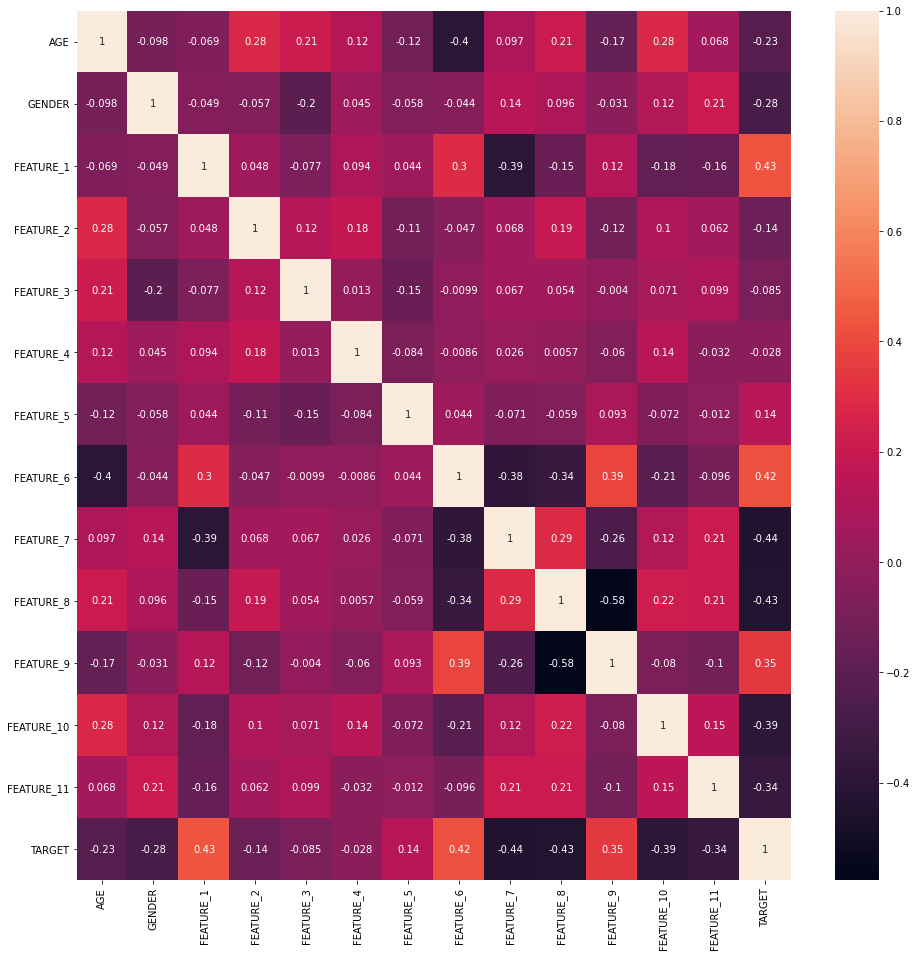

In [39]:
correlation = df_ill.corr()
fig=plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlation, annot=True)

### Как было замечено ранее - некоторые переменные количественно больше остальных. Они при классификации могут иметь больший "вес". Этот факт может сказаться на точнсти прогноза

### Сналача построим модель на "сырых" данных. Первая модель будет метод опорных векторов

In [40]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [41]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernel:
    first_model = SVC(kernel = kernel)
    first_model.fit(X_train, y_train)
    y_pred_first_model = first_model.predict(X_test)
    print('{} - {}'.format(kernel, f1_score(y_test.values, y_pred_first_model)))

linear - 0.8316831683168315
rbf - 0.7692307692307693
poly - 0.7610619469026547
sigmoid - 0.7092198581560284


### Как видно - линейное ядро справилось лучше всего

### Теперь попробуем стандартизировать X-переменные и произвести предыдущий алгоритм.

In [42]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(x_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [43]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [44]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernel:
    first_model = SVC(kernel = kernel)
    first_model.fit(X_train_scaled, y_train)
    y_pred_first_model = first_model.predict(X_test_scaled)
    print('{} - {}'.format(kernel, f1_score(y_test.values, y_pred_first_model)))

linear - 0.8282828282828283
rbf - 0.816326530612245
poly - 0.8316831683168315
sigmoid - 0.8349514563106797


### Теперь не так стало важно, какое ядро использовать. Сейчас лидер - сигмойд-ядро на стандартизированных данных.

### Сейчас попробуем стандартизировать только те столбцы, которые количественно больше. Стандартизировать будем в  диапазоне от 0 до 5

In [45]:
df_ill_copy = df_ill.copy()

In [46]:
df_ill_copy['AGE_NORM'] = ((df_ill_copy['AGE'] - min(df_ill_copy['AGE'])) / (max(df_ill_copy['AGE']) - min(df_ill_copy['AGE']))) * 5
df_ill_copy['FEATURE_2_NORM'] = ((df_ill_copy['FEATURE_2'] - min(df_ill_copy['FEATURE_2'])) / (max(df_ill_copy['FEATURE_2']) - min(df_ill_copy['FEATURE_2']))) * 5
df_ill_copy['FEATURE_3_NORM'] = ((df_ill_copy['FEATURE_3'] - min(df_ill_copy['FEATURE_3'])) / (max(df_ill_copy['FEATURE_3']) - min(df_ill_copy['FEATURE_3']))) * 5
df_ill_copy['FEATURE_6_NORM'] = ((df_ill_copy['FEATURE_6'] - min(df_ill_copy['FEATURE_6'])) / (max(df_ill_copy['FEATURE_6']) - min(df_ill_copy['FEATURE_6']))) * 5
del df_ill_copy['AGE']
del df_ill_copy['FEATURE_2']
del df_ill_copy['FEATURE_3']
del df_ill_copy['FEATURE_6']
df_ill_copy

,GENDER,FEATURE_1,FEATURE_4,FEATURE_5,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET,AGE_NORM,FEATURE_2_NORM,FEATURE_3_NORM,FEATURE_6_NORM
0,1,3,1,0,0,2.3,0,0,1,1,3.541667,2.405660,1.221461,3.015267
1,1,2,0,1,0,3.5,0,0,2,1,0.833333,1.698113,1.415525,4.427481
2,0,1,0,0,0,1.4,2,0,2,1,1.250000,1.698113,0.890411,3.854962
3,1,1,0,1,0,0.8,2,0,2,1,2.812500,1.226415,1.255708,4.083969
4,0,0,0,1,1,0.6,2,0,2,1,2.916667,1.226415,2.602740,3.511450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,2.916667,2.169811,1.312785,1.984733
299,1,3,0,1,0,1.2,1,0,3,0,1.666667,0.754717,1.575342,2.328244
300,1,0,1,1,0,3.4,1,2,3,0,4.062500,2.358491,0.764840,2.671756
301,1,0,0,1,1,1.2,1,1,3,0,2.916667,1.698113,0.057078,1.679389


In [47]:
X_norm = df_ill_copy.drop('TARGET', 1)
y_norm = df_ill_copy['TARGET']

In [48]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=42)

In [49]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernel:
    first_model = SVC(kernel = kernel)
    first_model.fit(X_train_norm, y_train_norm)
    y_pred_first_model = first_model.predict(X_test_norm)
    print('{} - {}'.format(kernel, f1_score(y_test_norm, y_pred_first_model)))

linear - 0.8316831683168315
rbf - 0.8543689320388349
poly - 0.8282828282828283
sigmoid - 0.8411214953271027


### Последняя нормировка столбцов действительно помогла. Для интереса попробуем произвести нормировку от 0 до 1

In [50]:
df_ill_copy_two = df_ill.copy()
df_ill_copy_two['AGE_NORM'] = ((df_ill_copy_two['AGE'] - min(df_ill_copy_two['AGE'])) / (max(df_ill_copy_two['AGE']) - min(df_ill_copy_two['AGE'])))
df_ill_copy_two['FEATURE_2_NORM'] = ((df_ill_copy_two['FEATURE_2'] - min(df_ill_copy_two['FEATURE_2'])) / (max(df_ill_copy_two['FEATURE_2']) - min(df_ill_copy_two['FEATURE_2'])))
df_ill_copy_two['FEATURE_3_NORM'] = ((df_ill_copy_two['FEATURE_3'] - min(df_ill_copy_two['FEATURE_3'])) / (max(df_ill_copy_two['FEATURE_3']) - min(df_ill_copy_two['FEATURE_3'])))
df_ill_copy_two['FEATURE_6_NORM'] = ((df_ill_copy_two['FEATURE_6'] - min(df_ill_copy_two['FEATURE_6'])) / (max(df_ill_copy_two['FEATURE_6']) - min(df_ill_copy_two['FEATURE_6']))) 
del df_ill_copy_two['AGE']
del df_ill_copy_two['FEATURE_2']
del df_ill_copy_two['FEATURE_3']
del df_ill_copy_two['FEATURE_6']
X_norm_two = df_ill_copy_two.drop('TARGET', 1)
y_norm_two = df_ill_copy_two['TARGET']
X_train_norm_two, X_test_norm_two, y_train_norm_two, y_test_norm_two = train_test_split(X_norm_two, y_norm_two, test_size=0.3, random_state=42)
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernel:
    first_model = SVC(kernel = kernel)
    first_model.fit(X_train_norm_two, y_train_norm_two)
    y_pred_first_model = first_model.predict(X_test_norm_two)
    print('{} - {}'.format(kernel, f1_score(y_test_norm_two, y_pred_first_model)))

linear - 0.8316831683168315
rbf - 0.8543689320388349
poly - 0.8761904761904761
sigmoid - 0.6881720430107526


### При таком подходе ядра стали больше варьироваться по метрике f1.
### Однако удалось добиться пока что наиболее качественного прогноза на полиномиальном ядре.

### Далее протестируем еще несколько алгоритмов. Данные будем брать только с последней предобработкой, чтобы не удлинять общий код.

#### Логистическая регрессия

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(random_state=0).fit(X_train_norm_two, y_train_norm_two)

In [53]:
f1_score(y_test_norm.values, clf.predict(X_test_norm_two))

0.8399999999999999

#### Наивный байесовский классификатор

In [54]:
from sklearn.naive_bayes import ComplementNB

In [55]:
сnb = ComplementNB()
y_pred = сnb.fit(X_train_norm_two, y_train_norm_two).predict(X_test_norm_two)
f1_score(y_test_norm_two.values, y_pred)

0.8125

#### Метод ближайших соседей

In [56]:
from sklearn.neighbors import KNeighborsClassifier 

In [57]:
for i in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    y_pred_kN = neigh.fit(X_train_norm_two, y_train_norm_two).predict(X_test_norm_two)
    print('{} neighbors - {}'.format(i, f1_score(y_test_norm_two.values, y_pred_kN)))

1 neighbors - 0.7766990291262137
2 neighbors - 0.6585365853658537
3 neighbors - 0.7872340425531915
4 neighbors - 0.7415730337078651
5 neighbors - 0.8247422680412372
6 neighbors - 0.7912087912087912
7 neighbors - 0.8316831683168315
8 neighbors - 0.8333333333333333
9 neighbors - 0.8282828282828283
10 neighbors - 0.8247422680412372


## Итог: самый лучший алгоритм - Метод опорных векторов с нормализацией возраста, второго, третьего и шестого признака в диапазон от 0 до 1 на полиномиальном ядре. Значение f1-метрики ~ 0.8761.
### Если нужно сделать прогноз с excel-файлом, как в первом задании, могу выслать отдельно.